<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow-and-Deep-Learning-fundamentals-with-Python-by-Daniel-Bourke-/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Project

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000


x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [4]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd

circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X0', ylabel='X1'>

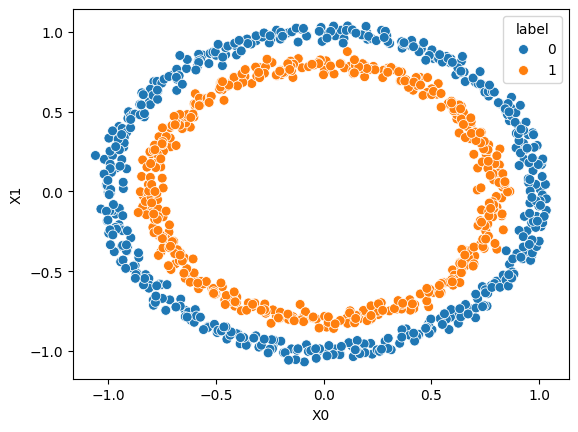

In [7]:
import seaborn as sns

sns.scatterplot(data=circles, x="X0", y="X1", hue="label", s=50)

In [8]:
x.shape,y.shape

((1000, 2), (1000,))

In [9]:
x[1],y[1]

(array([-0.75615888,  0.15325888]), 1)

In [10]:
import tensorflow as tf


simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

simple_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

simple_model.fit(x,y,epochs=200,verbose=0)

In [11]:
simple_model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5030 - loss: 3.0740


[3.1904022693634033, 0.4830000102519989]

In [12]:
simple_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])

simple_model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

simple_model_2.fit(x,y,epochs=100,verbose=0)

simple_model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5186 - loss: 0.6970


[0.7035754323005676, 0.4950000047683716]

In [13]:
simple_model_3  = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


simple_model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

simple_model_3.fit(x,y,epochs=100,verbose=0)

simple_model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5045 - loss: 0.6955


[0.6962000727653503, 0.5]

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_bounary(model,x,y):

  x_min,x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  y_pred = np.round(y_pred)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


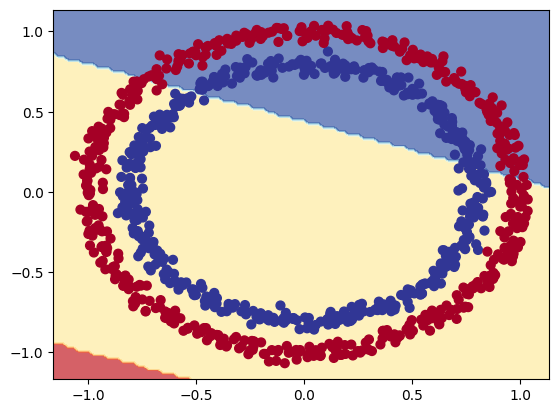

In [15]:
plot_decision_bounary((simple_model),x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...


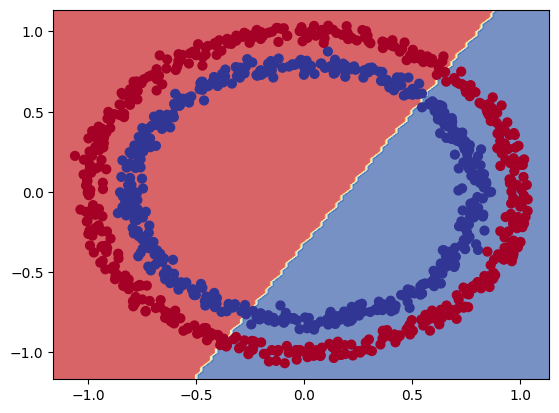

In [16]:
plot_decision_bounary(simple_model_2,x,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


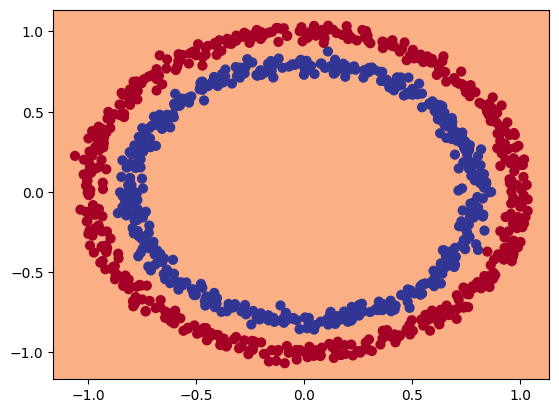

In [17]:
plot_decision_bounary(simple_model_3,x,y)

In [18]:
simple_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(1,"sigmoid")

])

simple_model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]

)

simple_model_4.fit(x,y,epochs=100,verbose=0)

simple_model_4.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9944 - loss: 0.0257


[0.02799023874104023, 0.9929999709129333]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


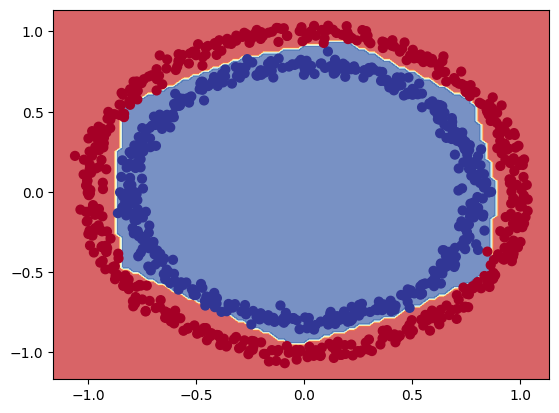

In [19]:
plot_decision_bounary(simple_model_4,x,y)

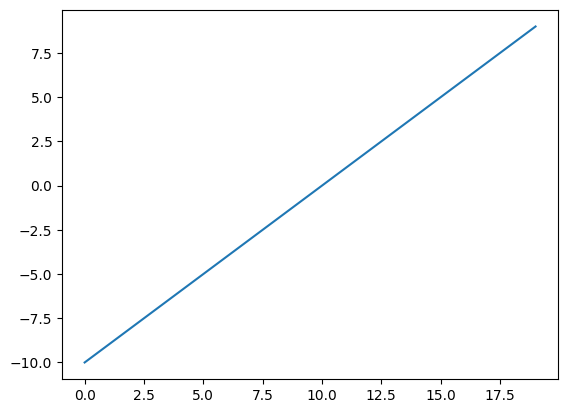

In [20]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A
plt.plot(A)

In [21]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

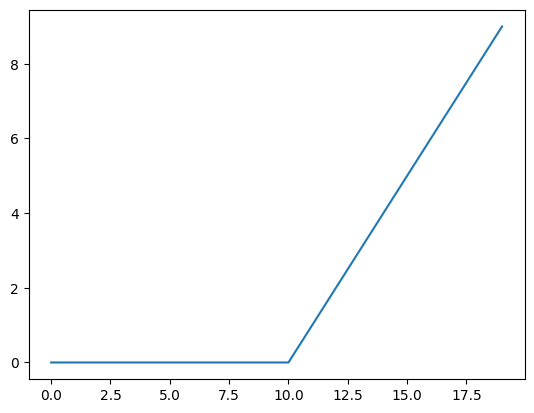

In [22]:
plt.plot(relu(A))

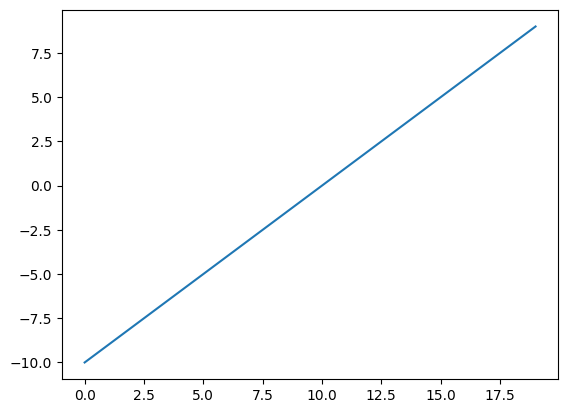

In [23]:
plt.plot(tf.keras.activations.linear(A));

In [24]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
tf.random.set_seed(42)

simple_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(1,"sigmoid")

])
simple_model_5.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]

)
history = simple_model_5.fit(x_train,y_train,epochs=25,verbose=1)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5165 - loss: 0.6883
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5596 - loss: 0.6815   
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.6751 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6199 - loss: 0.6673 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6351 - loss: 0.6583 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6494 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - loss: 0.6390 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6268 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.6096 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5840 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7597 - loss: 0.5549 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [27]:
simple_model_5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9530 - loss: 0.1803


[0.19228984415531158, 0.9599999785423279]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


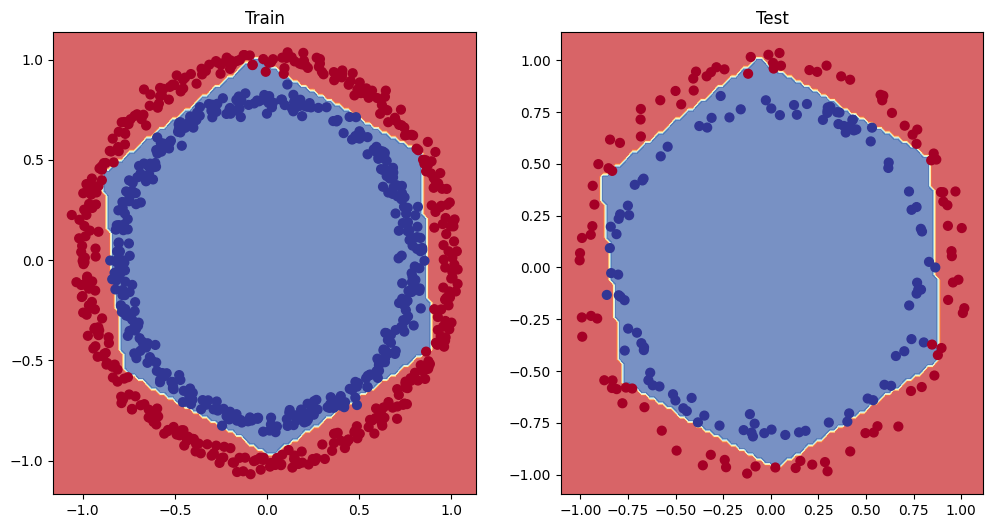

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_bounary(simple_model_5, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_bounary(simple_model_5, x=x_test, y=y_test)
plt.show()

In [29]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.50125,0.691016
1,0.55125,0.684016
2,0.57250,0.677488
3,0.59750,0.669556
4,0.61250,0.660864
5,0.62625,0.652234
6,0.63750,0.641765
7,0.65375,0.627610
8,0.75750,0.606676
9,0.76625,0.577042


Text(0.5, 0, 'epochs')

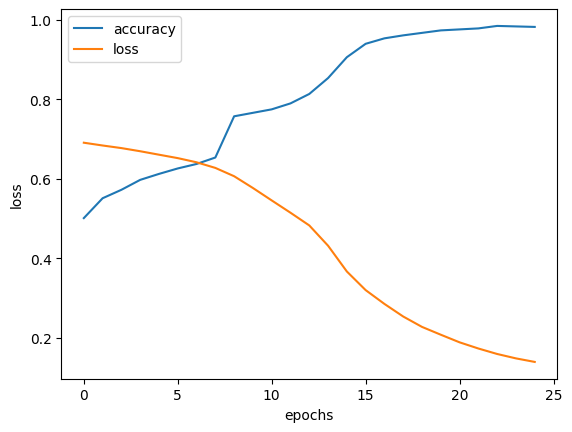

In [30]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [31]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


model_6.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

history = model_6.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4994 - loss: 0.7047 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4838 - loss: 0.7035 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4798 - loss: 0.7023 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4818 - loss: 0.7010 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4828 - loss: 0.6997 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4833 - loss: 0.6984 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4842 - loss: 0.6971 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 0.6958 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4841 - loss: 0.6946 - learning_

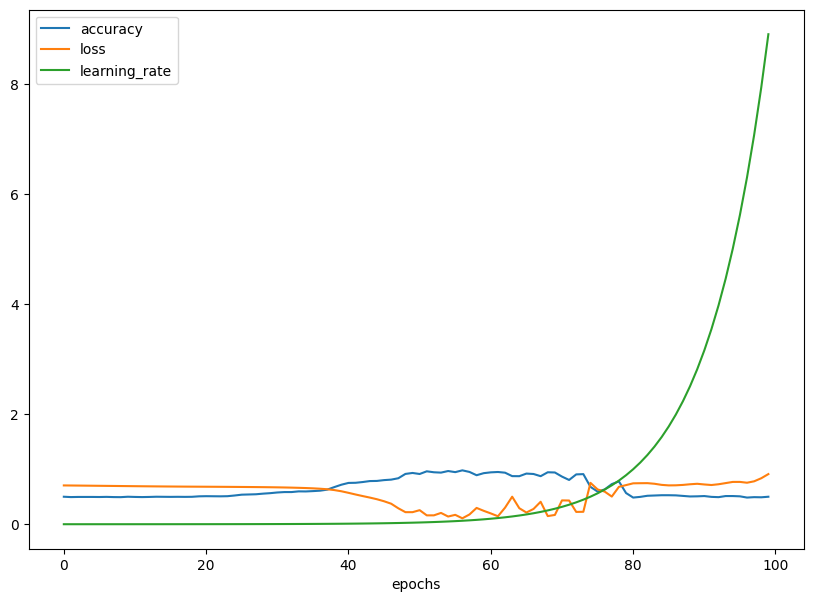

In [32]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

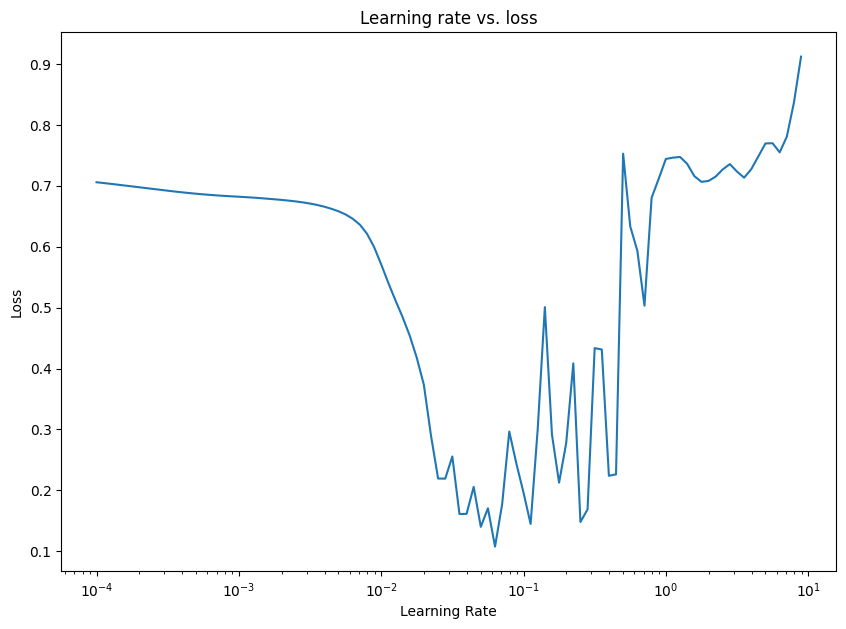

In [33]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [36]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,"relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_7.compile(
    loss='binary_crossentropy',
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)



history_7 = model_7.fit(x_train,y_train,epochs=25,verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4666 - loss: 0.7037
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5033 - loss: 0.6928 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5198 - loss: 0.6915 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5191 - loss: 0.6893 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5353 - loss: 0.6837 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 0.6736 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 0.6609 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5957 - loss: 0.6390 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 0.6079 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.5723 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.5077 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

In [37]:
model_7.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9330 - loss: 0.1935


[0.20038551092147827, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


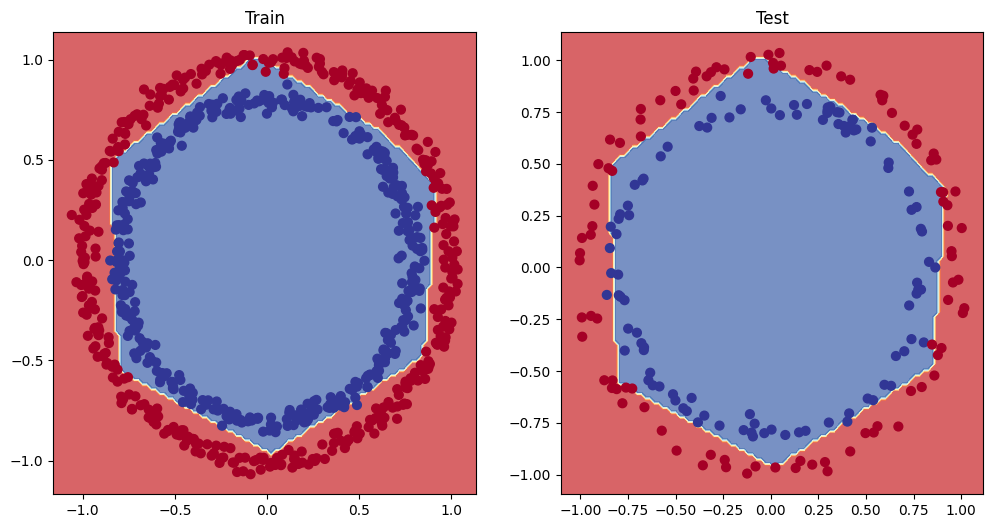

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_bounary(model_7, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_bounary(model_7, x=x_test, y=y_test)
plt.show()

In [39]:
loss,accuracy = model_7.evaluate(x_test,y_test)

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1935 
Model Loss: 0.20038551092147827
Model Accuracy: 93.50000023841858%


In [40]:
y_pred_7 = model_7.predict(x_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,tf.round(y_pred_7)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       100
           1       0.92      0.95      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



<Axes: >

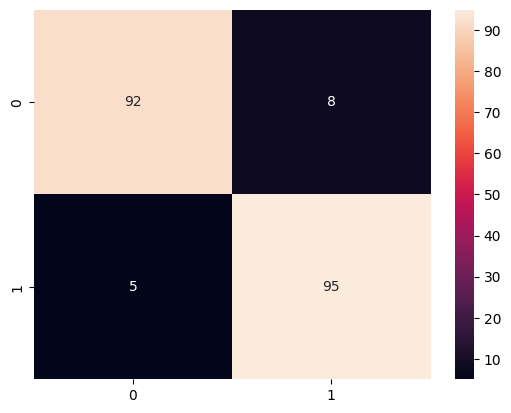

In [42]:
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,tf.round(y_pred_7))
sns.heatmap(confusion_matrix,annot=True,fmt="d")

# mnist Project(Multiclass Classification)

In [43]:

from tensorflow.keras.datasets import fashion_mnist

In [44]:
(test_data,test_labels),(train_data,train_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
print(f"train data shape: {train_data.shape}, train labels shape: {train_labels.shape}")
print(f"test data shape: {test_data.shape}, test labels shape: {test_labels.shape}")

train data shape: (10000, 28, 28), train labels shape: (10000,)
test data shape: (60000, 28, 28), test labels shape: (60000,)


In [46]:
train_data[0].shape,train_labels[0]

((28, 28), 9)

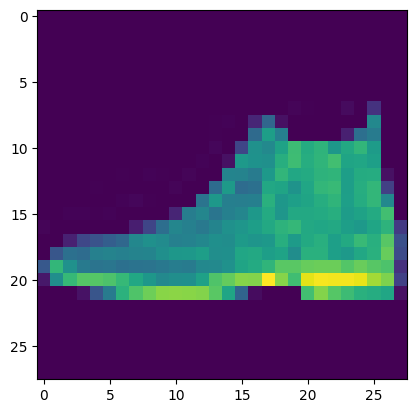

In [47]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

6


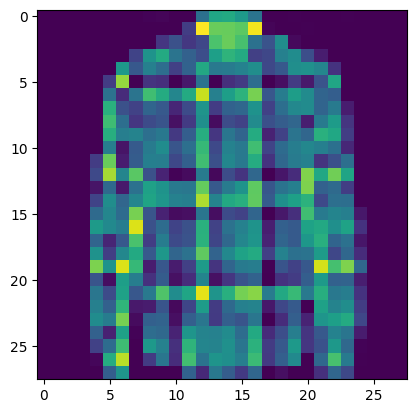

In [48]:
plt.imshow(train_data[7])
print(train_labels[7])

In [49]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']


len(class_names)

10

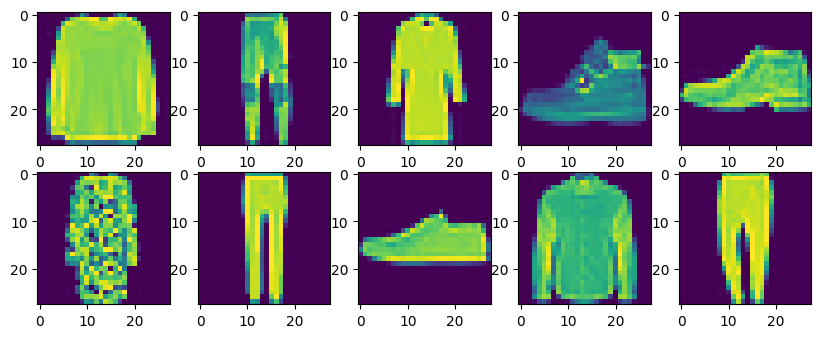

In [50]:
 import random


 plt.figure(figsize=(10,10))

 for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.randint(0,len(train_data))
  plt.imshow(train_data[rand_index])

In [51]:
train_data[0].shape

(28, 28)

In [52]:
len(class_names)

10

In [53]:
train_data.min(),train_data.max()


(0, 255)

In [54]:
test_data.min(),test_data.max()

(0, 255)

In [55]:
#we can get our training data and testing data between 0 &1 by dividing mix() values

train_data = train_data/255.0
test_data = test_data/255.0

In [56]:
train_data.min(),train_data.max()

(0.0, 1.0)

In [57]:
flattenn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
])
flattenn_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [61]:


multiclass_model_1  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multiclass_model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

multiclass_model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = multiclass_model_1.fit(train_data,
                       train_labels,
                       validation_data = (test_data,test_labels),
                       epochs=10)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2110 - loss: 2.0699 - val_accuracy: 0.4028 - val_loss: 1.5858
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4266 - loss: 1.5160 - val_accuracy: 0.4799 - val_loss: 1.3191
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5433 - loss: 1.2668 - val_accuracy: 0.5923 - val_loss: 1.1198
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6301 - loss: 1.1002 - val_accuracy: 0.6516 - val_loss: 1.0093
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6680 - loss: 0.9968 - val_accuracy: 0.6857 - val_loss: 0.9257
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6879 - loss: 0.9163 - val_accuracy: 0.6995 - val_loss: 0.8721
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7056 - loss: 0.8630 - val_accuracy: 0.7074 - val_loss: 0.8359
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7144 - loss: 0.8241 - val_accura

<Axes: >

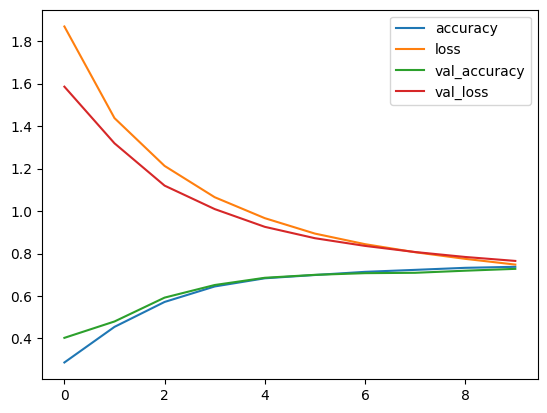

In [63]:
pd.DataFrame(history.history).plot()

In [64]:
#finding the learning rate

tf.random.set_seed(42)

multiclass_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multiclass_model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_scheduler_2 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_2 = multiclass_model_2.fit(train_data,
                                   train_labels,
                                   validation_data=(test_data,test_labels),
                                   epochs=40,
                                   callbacks=[lr_scheduler_2])

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1802 - loss: 2.1327 - val_accuracy: 0.3146 - val_loss: 1.7832 - learning_rate: 0.0010
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3920 - loss: 1.6395 - val_accuracy: 0.5151 - val_loss: 1.3154 - learning_rate: 0.0011
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5253 - loss: 1.2466 - val_accuracy: 0.5410 - val_loss: 1.1323 - learning_rate: 0.0013
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5507 - loss: 1.0919 - val_accuracy: 0.5579 - val_loss: 1.0386 - learning_rate: 0.0014
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5692 - loss: 1.0115 - val_accuracy: 0.5867 - val_loss: 0.9929 - learning_rate: 0.0016
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5858 - loss: 0.9672 - val_accuracy: 0.6039 - val_loss: 0.9506 - learning_rate: 0.0018
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6107 - loss: 0.9240 - val_a

Text(0, 0.5, 'Loss')

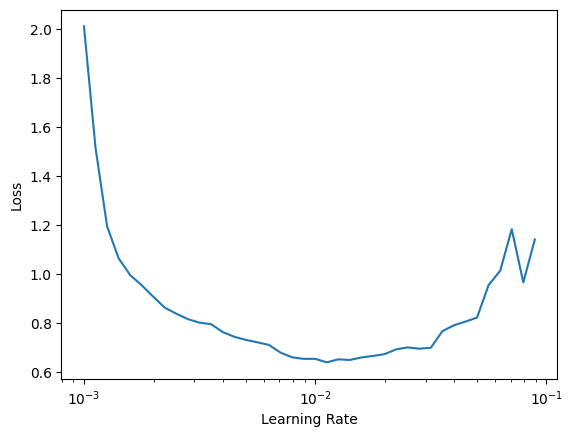

In [65]:
lrs = 1e-3 *(10**(np.arange(40)/20))

plt.figure()
plt.semilogx(lrs,history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [98]:
tf.random.set_seed(42)

multiclass_model_3  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

multiclass_model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_3 = multiclass_model_3.fit(train_data,
                                train_labels,
                                batch_size=32,
                                validation_data=(test_data,test_labels),
                                epochs=40)

Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2199 - loss: 2.0896 - val_accuracy: 0.3415 - val_loss: 1.5078
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3877 - loss: 1.4131 - val_accuracy: 0.5359 - val_loss: 1.1439
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5664 - loss: 1.1200 - val_accuracy: 0.6554 - val_loss: 0.9756
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6518 - loss: 0.9719 - val_accuracy: 0.6898 - val_loss: 0.8876
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6914 - loss: 0.8921 - val_accuracy: 0.7076 - val_loss: 0.8338
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7084 - loss: 0.8386 - val_accuracy: 0.7213 - val_loss: 0.7961
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7196 - loss: 0.8002 - val_accuracy: 0.7322 - val_loss: 0.7683
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7307 - loss: 0.7705 - val_accuracy

In [99]:
loss,accuracy = multiclass_model_3.evaluate(test_data,test_labels)

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7972 - loss: 0.5961
Model Loss: 0.592291533946991
Model Accuracy: 79.76666688919067%


In [100]:
y_predt_multi_3 = multiclass_model_3.predict(test_data)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [101]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

<Axes: >

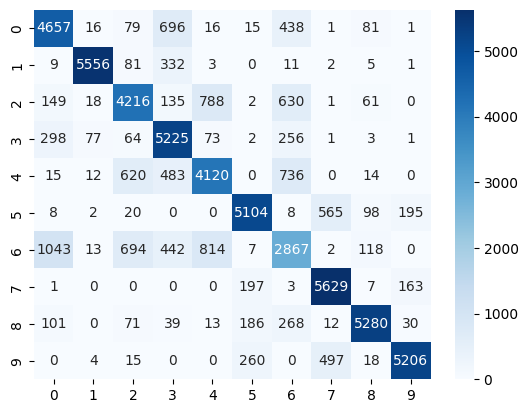

In [102]:
multiclass_model_3_confusion_matrix = confusion_matrix(test_labels,np.argmax(y_predt_multi_3,axis=1))
sns.heatmap(multiclass_model_3_confusion_matrix,annot=True,fmt="d", cmap="Blues")

In [113]:
import random


def plot_random_image(model,images,true_labels,class_names):

  rand_index = random.randint(0,len(images))
  target_image = images[rand_index]
  target_image = model.predict(target_image.reshape(1, 28, 28))
  plt.figure(figsize=(1,1))
  plt.imshow(images[rand_index])

  pred_label = class_names[np.argmax(target_image)]
  true_label = class_names[true_labels[rand_index]]

  print(f"Predicted label: {pred_label}")
  print(f"True label: {true_label}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Bag
True label: Bag


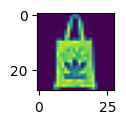

In [114]:
plot_random_image(multiclass_model_3,test_data,test_labels,class_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Ankle boot
True label: Ankle boot


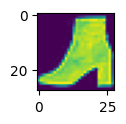

In [115]:
plot_random_image(multiclass_model_3,test_data,test_labels,class_names)
